<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/CNN_CIFAR_10_Categorical_Classification_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 - Categorical Classification

CNN으로 컬러 이미지 분류하기(10종류)


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Tensorflow & Keras

* import Keras

In [2]:
import keras

keras.__version__

'2.4.3'

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)#컬러이므로 마지막이 3

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


# II. Data Preprocessing

> ## 1) Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [7]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


> ## 2) One Hot Encoding

In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의

In [10]:
from keras import models
from keras import layers

#CNN
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#DNN
model.add(layers.Flatten()) #한줄로 편다
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

* 모델 구조 확인

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

> ## 2) Model Compile

* 모델 학습방법 설정

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [13]:
%%time

Hist_model = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 35s 8ms/step - loss: 1.9340 - accuracy: 0.2799 - val_loss: 1.4520 - val_accuracy: 0.4742
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 1.4051 - accuracy: 0.4915 - val_loss: 1.3422 - val_accuracy: 0.5213
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 1.2480 - accuracy: 0.5559 - val_loss: 1.2198 - val_accuracy: 0.5699
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 1.1426 - accuracy: 0.5960 - val_loss: 1.0999 - val_accuracy: 0.6131
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 1.0377 - accuracy: 0.6351 - val_loss: 1.0785 - val_accuracy: 0.6250
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 1.0051 - accuracy: 0.6475 - val_loss: 0.9961 - val_accuracy: 0.6522
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.9315 - accuracy: 0.6696 - val_loss: 0.9855 - val_accuracy: 0.659

> ## 4) 학습 결과 시각화

* Loss Visualization

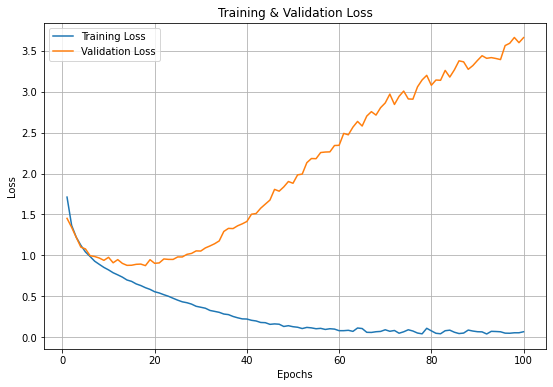

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_model.history['loss'])
plt.plot(epochs, Hist_model.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
#DNN만 사용했을 경우 보다 accuracy가 높아짐

313/313 [==============================] - 1s 2ms/step - loss: 3.7041 - accuracy: 0.6667
Loss = 3.70413
Accuracy = 0.66670


# 
# 
# 
# The End
# 
# 
# 